In [2]:
#%matplotlib qt
#%matplotlib nbagg
%matplotlib inline
#%matplotlib notebook

import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

# 1. Loading your .bcf file

In [3]:
sample_name = '2.bcf'# input your xxx.bcf file inside ''

In [4]:
s1=hs.load(sample_name) 

# 2. Check if the elements were selected and if the X-ray lines were selected
Usefull methods:
<br>
1. The elements present in the sample can be defined using the set_elements() and add_elements() methods. Only element abbreviations are accepted:
<br>
s.set_elements(['Fe', 'Pt'])
<br>
s.add_elements(['Cu'])
<br>
2.The X-ray lines can be defined using the set_lines() and add_lines() methods. The corresponding elements will be added automatically. Several lines per element can be defined at once.
<br>
s.set_lines(['Fe_Ka', 'Pt_La'])
<br>
s.add_lines(['Fe_La'])
<br>
3. You can check the energies from certain elements by using:
<br>
hs.material.elements.Fe.Atomic_properties.Xray_lines
<br>
4. To find the nearest X-ray line for a given energy, use the utility function get_xray_lines_near_energy() to search the elemental database:
<br>
P = s.find_peaks1D_ohaver(maxpeakn=1)[0] #find the all the possible peak, choose the specific one ([0] here refer to the first peak)
<br>
hs.eds.get_xray_lines_near_energy(P['position'], only_lines=['a', 'b'])
['C_Ka', 'Ca_La', 'B_Ka']
<br>


In [5]:
s1[1].metadata.Sample
# check the elements 
# check the X-ray lines

├── elements = ['O', 'W', 'Zr']
├── name = PG_0 4162
└── xray_lines = ['O_Ka', 'W_Ma', 'Zr_La']

In [6]:
#Skip this cell if all the elements and x-ray lines have been added
# this is for checking all the All_Elements = ['O', 'W', 'Zr','Hf','Al','Cu'] #modify the list of elements
Elements = ['O', 'W', 'Zr']
s1[1].set_elements(Elements)
# this is for checking all the x-ray lineAll_Xray_lines=['O_Ka', 'W_La', 'Zr_Ka','Zr_La','W_Ma','W_Lb1', 'Hf_Ma','Hf_La','Hf_Lb3','Al_Ka','Cu_Ka','Cu_Kb','Cu_La','Ga_Ka','Ga_Kb','Ga_La'] #modify the list of x-ray lines
Xray_lines = ['O_Ka', 'W_La', 'Zr_Ka']
s1[1].set_lines(Xray_lines) 

In [7]:
s1[1].metadata#.Sample.elements 
#there should be a list of elements printed here. If not, please use the following cell to add the element(s). Otherwise, 
#skip the next cell

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 45.0
│       │       ├── detector_type = XFlash 6T|60
│       │       ├── elevation_angle = 21.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       └── real_time = 1729.1447039999998
│       ├── Stage
│       │   └── tilt_alpha = 0.0
│       ├── beam_energy = 200
│       └── magnification = 2000000
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.5
│   │       ├── io_plugin = hyperspy.io_plugins.bruker
│   │       ├── operation = load
│   │       └── timestamp = 2024-02-08T14:50:48.387650-05:00
│   ├── date = 2024-02-05
│   ├── original_filename = 2.bcf
│   ├── time = 13:47:08
│   └── title = EDX
├── Sample
│   ├── elements = ['O', 'W', 'Zr']
│   ├── name = PG_0 4162
│   └── xray_lines = ['O_Ka', 'W_La', 'Zr_Ka']
└── Signal
    ├── quantity = X-rays (Counts)
    └── signal_type = EDS_TEM

In [8]:
s1[1].metadata.Sample.xray_lines #there should be a list of X-rays lines printed here. If not, please use the following cell to add the element(s). Otherwise, 
#skip the next cell

['O_Ka', 'W_La', 'Zr_Ka']

# 3. Denoising spectrum, 
<br>
If the spectrum is noisy, you can:
<br>
1. Binning the pixel to enhance the signal-to-noise ratio using rebin(scale=(dim1,dim2,dim3)). dim1 and dim2 are the navigation axis, dim3 are the spectrum. In most cases yuou need to bin dim1 and dim2 to same sizes i.e. 2, 3
<br>
2. Machine learning methods (PCA analysis). The available algorithm are: algorithm ({"SVD", "MLPCA", "sklearn_pca", "NMF", "sparse_pca", "mini_batch_sparse_pca", "RPCA", "ORPCA", "ORNMF", custom object}, default "SVD") 

3.1 Binning

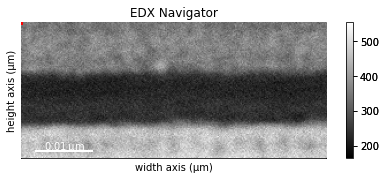

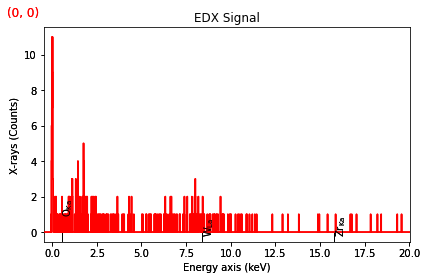

In [9]:
s1[1].plot(True) # you can drag the red dot on the top left in the navigation image to locate the ROI and check the EDS spectrum.

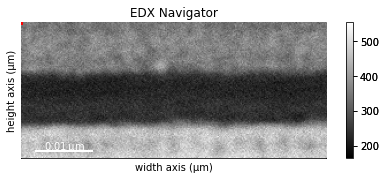

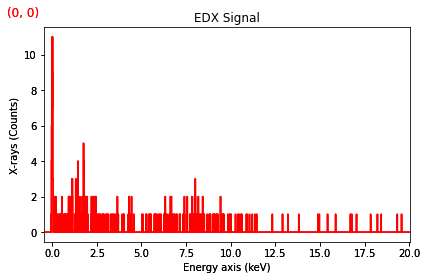

In [10]:
#Bin the pixel if it is noisy.
s=s1[1].rebin(scale=(1,1,1)) # scale = (x,x,1), x,x is the binning number you want to type. 2 refers to integrate 4 pixel into 1,
#3 corresponding to 9, 4 corresponding to 16 and etc. Binning will decrease the spatial resolution, so you need to consider this
# trade-off
s.plot()

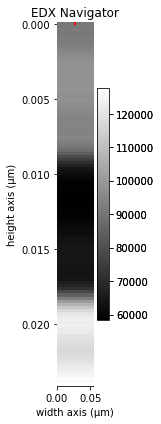

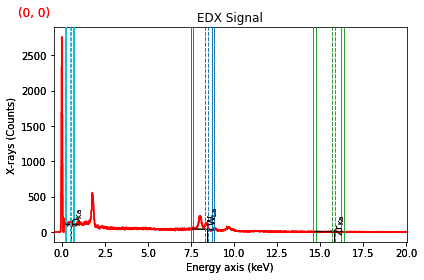

In [11]:
# if you want to integrate horizontal or vertical pixel, run the following
#s=s1[1].isig[0.01:20.]# use float value to choose energy range
bw = s.estimate_background_windows(line_width=[5,2]) 
def plot_binning_image(s,input):
    integrated_v=np.shape(s)[0]
    s_v=s.rebin(scale=(2,integrated_v,1))
    integrated_h=np.shape(s)[1]
    s_h=s.rebin(scale=(integrated_h,1,1))
    if input=='h':
        s_h.plot(background_windows=bw,integration_windows=1)
    elif input=='v':
        s_v.plot()
    else:
        print ('Please type "h" for horizontal integration, "v" for vertical integration.')
        
integrated_v=np.shape(s)[0]
s_v=s.rebin(scale=(2,integrated_v,1))
integrated_h=np.shape(s)[1]
s_h=s.rebin(scale=(integrated_h,1,1))
plot_binning_image(s,'h') #swith 'h' to 'v' if you want to sum vertically

3.2 PCA denoising

In [110]:
#A successful PCA analysis can reveal all the elements in the samples. You need add all the possible x-ray lines (even the b lines) to 
#check if the PCA analysi is right
All_Elements = ['O', 'W', 'Zr','Hf','Al','Cu'] #modify the list of elements
#Elements = ['O', 'W', 'Zr']
s1[1].set_elements(All_Elements)
# this is for checking all the x-ray line you can referece hs.material.elements.W.Atomic_properties.Xray_lines to get all the posisble x-ray lines
All_Xray_lines=['O_Ka', 'W_La', 'Zr_Ka','Zr_La','W_Ma','W_Lb1', 'W_Lb2','W_Lg1','W_Lg3','Hf_Ma','Hf_La','Hf_Lb3','Al_Ka','Cu_Ka','Cu_Kb','Cu_La','Ga_Ka','Ga_Kb','Ga_La'] #modify the list of x-ray lines
#Xray_lines = ['O_Ka', 'W_La', 'Zr_Ka']
s1[1].set_lines(All_Xray_lines) 

In [111]:
s1[1].change_dtype('float')
s1[1].decomposition(normalize_poissonian_noise=True)  # more details see hyperspy documentation pagehttps://hyperspy.org/exspy/reference/signals.html#exspy.signals.EDSTEMSpectrum.decomposition

Decomposition info:
  normalize_poissonian_noise=True
  algorithm=SVD
  output_dimension=None
  centre=None


<AxesSubplot:title={'center':'EDX\nPCA Scree Plot'}, xlabel='Principal component index', ylabel='Proportion of variance'>

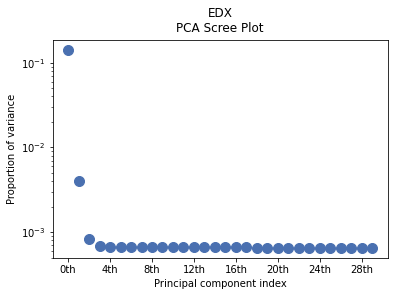

In [112]:
s1[1].plot_explained_variance_ratio() # Find the elbow point which is the onset of flat line. In this case 4 is the first point.

In [113]:
sr = s1[1].get_decomposition_model(4)

<AxesSubplot:xlabel='Energy (keV)', ylabel='Intensity'>

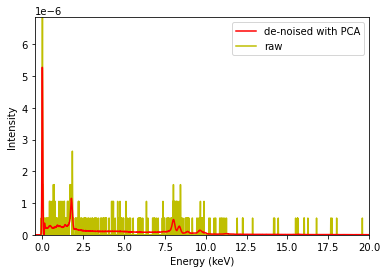

In [114]:
# You can plot the spectrum before and after denoising
import copy
s_norm = s1[1].deepcopy()
sr_norm = sr.deepcopy()
factor = 1 # factor is the value you mannually change it to make the intensities of two spectra compariable
s_norm.isig[:].data /= np.sum(s_norm.isig[-0.05:0.05].data)* factor
sr_norm.isig[:].data /= np.sum(sr_norm.isig[-0.05:0.05].data) 
hs.plot.plot_spectra([s_norm.inav[10, 1], sr_norm.inav[10, 1]], color=['y', 'r'], 
                     legend=['raw', 'de-noised with PCA'])

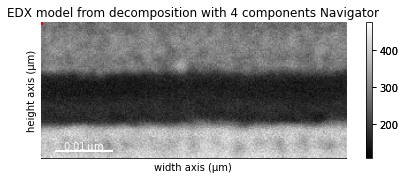

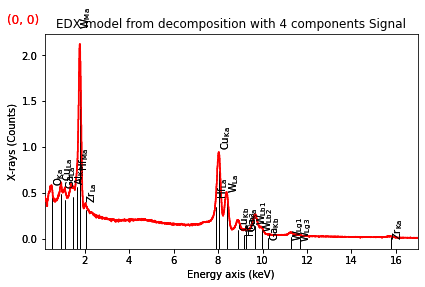

In [119]:
sr.isig[0.2:17.].plot(True) # using isig to slice the energy range i.e. sr.isig[0.4:] means starting from 0.4kV to maximum energy
#Once all the peaks in the denoised spectrum were confirmed, the PCA analysis can be accepted.

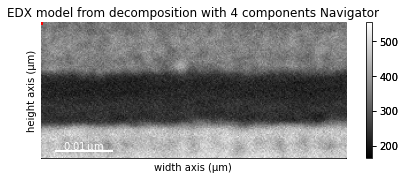

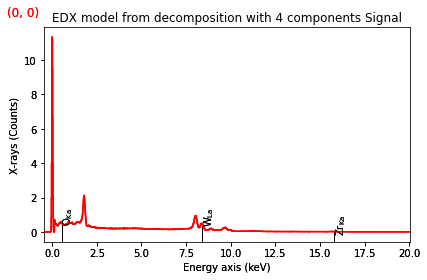

In [120]:
#Set the desired elements and x-ray line back
Elements = ['O', 'W', 'Zr']
sr.set_elements(Elements)
Xray_lines = ['O_Ka', 'W_La', 'Zr_Ka']
sr.set_lines(Xray_lines) 
sr.plot(True) 

# 4. Removing the background, negative pixel and plot the image based on your need.

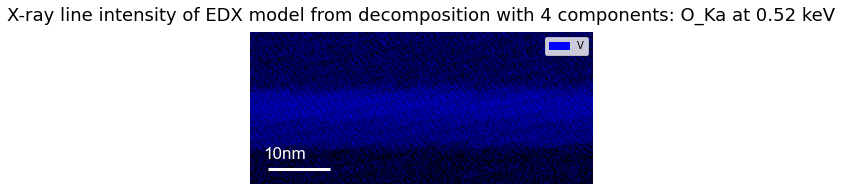

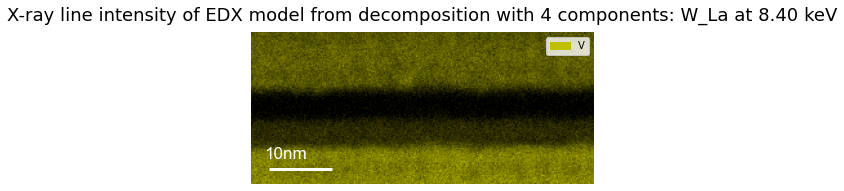

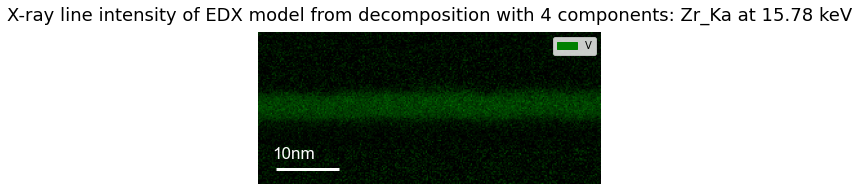

In [145]:
# Depending on the previous step, you can use 's' for binning spectrum or 'sr' for denoising spectrum
signal = sr # or s

bw = signal.estimate_background_windows(line_width=[6., 1.]) 

# remove the negative intensity
def negative_removal(eds_maps):
    for i in range(len(eds_maps)):
        raw_data=eds_maps[i].data
        raw_data[raw_data<0.0]=0
    return eds_maps
eds_maps=signal.get_lines_intensity(Xray_lines,background_windows=bw, integration_windows=1.)
eds_maps=negative_removal(eds_maps)


# define a plotting scalebar function
def plot_scale_bar(signal, position = 'left', unit = 'nm', length_scalebar = 10):
    v_range = np.shape(signal.data)[0]
    h_range = np.shape(signal.data)[1]
    if unit == 'nm' and signal.axes_manager[0].units == 'µm':
        signal.axes_manager[0].scale*=1000
        signal.axes_manager[0].units = 'nm'
    size_factor = signal.axes_manager[0].scale
    if position == 'left':
        y = v_range * 0.9
        y_text = v_range * 0.8
        x_start = 0.05 * h_range
        x_text = 0.10 * h_range
        x_finish = x_start + length_scalebar / size_factor
        plt.hlines(y=y, xmin=x_start, xmax = x_finish, colors='white', linestyles='solid',linewidth=3)
        plt.text(x=x_text, y=y_text, s =str(length_scalebar)+unit, color='white', fontsize=17, ha='center', va='center', fontname='Arial')
        
    
#Please type "o" for overlay image, "i" for plotting each elemental map  
def plot_images(eds_maps,plot_type='i'):
    list_of_colors=['b','y','g','m']
    y1=105
    y2=33*2
    #x_max = 132
    #x_min = 0
    #plt.axhline(y=22, xmin=x_min,xmax=x_max)
    if plot_type=='o':
        hs.plot.plot_images(eds_maps, axes_decor='off',overlay=True,tight_layout=True,colors=list_of_colors)
        plot_scale_bar(signal, position = 'left', unit = 'nm', length_scalebar = 10)
        #plt.savefig('Overlay_bin2.tif')
    elif plot_type=='i':
        for i in range(len(Xray_lines)):
            hs.plot.plot_images(eds_maps[i:i+1], axes_decor='off',overlay=True,tight_layout=True,colors=list_of_colors[i])
            plot_scale_bar(signal)
            #plt.savefig('{}-bin2.tif'.format(Elements[i]))
    else:
        print('Please type "o" for overlay image, "i" for plotting each elemental map' )
plot_images(eds_maps,'i')

# 5. Quanfication (Converting the count map to concentration map)


5.1 Cliff-lorimer quantification
<br>
We need to know the kfactor for the specific x-ray lines. 

In [155]:
#We use
kfactors=[1.7,4.824,6.18]
bw = signal.estimate_background_windows(line_width=[5, 3]) 
intensities = signal.get_lines_intensity(background_windows=bw,integration_windows=2.)
#filtering all the negative data
for i in range(len(intensities)):
    raw0 = eds_maps[i].data
    raw0[raw0<=0]=0.001
    eds_maps[i].data=raw0
    raw = intensities[i].data
    raw[raw<=0]=0.001
    intensities[i].data=raw
weight_percent = signal.quantification(intensities, method='CL',
                                  factors=kfactors,composition_units='atomic')

[########################################] | 100% Completed |  0.1s


In [156]:
for i in range(3):
    for j in range(2):
        weight_percent[i].axes_manager[j].units='nm'
        weight_percent[i].axes_manager[j].scale*=1000
#weight_percent[2].axes_manager.gui()

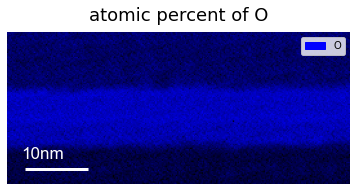

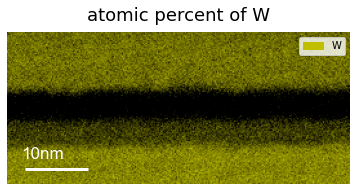

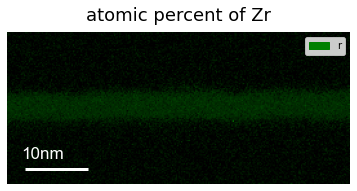

In [157]:
plot_images(weight_percent,'i')

In [204]:
import pandas as pd
column = ['Z', 'Element', 'K','L','M']
data = [
    [1, 'H', 0, 0, 0],[2, 'He', 0, 0, 0],[3, 'Li', 0, 0, 0],[4, 'Be', 181.983, 0, 0],[5, 'B', 8.985, 0, 0],
    [6, 'C', 11.907, 0, 0], [7, 'N', 3.218, 0, 0],[8, 'O', 1.700, 0, 0],[9, 'F', 1.503, 0, 0],[10, 'Ne', 0.966, 0, 0],
    [11, 'Na', 0.932, 0, 0], [12, 'Mg', 9.868, 0, 0], [13, 'Al', 11.011, 0, 0], [14, 'Si', 3.596, 0.000, 0.000],
    [15, 'P', 1.050, 0.000, 0.000],    [16, 'S', 4.296, 0, 0], [17, 'Cl', 1.049, 0, 0], [18, 'Ar', 1.141, 0, 0], [19, 'K', 1.077, 0, 0], [20, 'Ca', 1.157, 92.905, 0], [21, 'Sc', 1.191, 40.965, 0],
    [22, 'Ti', 1.210, 29.213, 0],  [23, 'V', 1.259, 15.657, 0], [24, 'Cr', 1.278, 7.943, 0],
    [25, 'Mn', 3.469, 4.798, 0], [26, 'Fe', 2.806, 2.863, 0],
    [27, 'Co', 1.518, 2.311, 0], [28, 'Ni', 1.556, 1.853, 0],
    [29, 'Cu', 2.073, 1.677, 0], [30, 'Zn', 1.860, 1.723, 0],
    [31, 'Ga', 2.070, 2.123, 0], [32, 'Ge', 2.265, 2.054, 0],
    [33, 'As', 2.481, 2.136, 0], [34, 'Se', 2.807, 2.154, 0],
    [35, 'Br', 3.078, 2.113, 0], [36, 'Kr', 3.546, 2.263, 0],
    [37, 'Rb', 4.009, 2.233, 0],[38, 'Sr', 4.616, 2.274, 0.000],
[39, 'Y', 5.295, 2.343, 0.000], [40, 'Zr', 6.180, 2.360, 0.000],[40, 'Zr', 6.180, 2.360, 0.000],
[41, 'Nb', 7.262, 2.320, 0.000],
[42, 'Mo', 8.642, 2.361, 0.000],
[43, 'Tc', 10.257, 2.520, 0.000],
[44, 'Ru', 12.381, 2.493, 0.000],
[45, 'Rh', 14.768, 2.622, 0.000],
[46, 'Pd', 17.985, 2.738, 0.000],
[47, 'Ag', 21.470, 2.804, 0.000],
[48, 'Cd', 26.328, 2.939, 0.000],
[49, 'In', 31.736, 2.938, 0.000],
[50, 'Sn', 38.849, 3.303, 0.000],
[51, 'Sb', 47.074, 3.421, 0.000],
[52, 'Te', 58.429, 3.575, 0.000],
[53, 'I', 68.682, 3.557, 0.000],
[54, 'Xe', 83.757, 3.652, 0.000],
[55, 'Cs', 100.587, 3.678, 0.000],
[56, 'Ba', 122.888, 3.789, 251.024],
[57, 'La', 146.460, 3.779, 36.353],
[58, 'Ce', 174.287, 3.779, 21.616],
[59, 'Pr', 206.116, 3.772, 16.083],
[60, 'Nd', 248.193, 3.835, 12.610],[61, 'Pm', 293.576, 3.847, 9.775],
[62, 'Sm', 357.046, 4.036, 9.526],
[63, 'Eu', 423.472, 4.054, 7.025],
[64, 'Gd', 513.709, 4.178, 3.642],
[65, 'Tb', 608.318, 4.188, 5.337],
[66, 'Dy', 726.462, 4.229, 4.202],[67, 'Ho', 863.910, 4.297, 3.838],
[68, 'Er', 1020.079, 4.322, 3.737],
[69, 'Tm', 1203.458, 4.369, 2.699],
[70, 'Yb', 1435.566, 4.310, 2.588],
[71, 'Lu', 1690.141, 4.565, 1.928],
[72, 'Hf', 2008.353, 4.674, 1.839],
[73, 'Ta', 2366.031, 4.739, 1.768],
[74, 'W', 2793.954, 4.824, 1.740],
[75, 'Re', 3280.444, 4.813, 2.310],
[76, 'Os', 3894.591, 4.834, 0.734],
[77, 'Ir', 4566.981, 4.817, 1.275],
[78, 'Pt', 5378.208, 4.893, 1.438],
[79, 'Au', 6288.581, 4.892, 1.536],
[80, 'Hg', 7434.261, 4.991, 1.950],
[81, 'Tl', 8777.332, 5.122, 2.841],
[82, 'Pb', 10312.191, 5.257, 3.562],
[83, 'Bi', 12054.599, 5.395, 3.445],[84, 'Po', 13950.156, 5.504, 3.495],
[85, 'At', 16250.293, 5.628, 3.475],
[86, 'Rn', 19882.856, 6.125, 3.419],
[87, 'Fr', 23123.224, 6.316, 3.577],
[88, 'Ra', 27146.164, 6.580, 3.493],
[89, 'Ac', 31583.326, 6.829, 3.390],
[90, 'Th', 37429.922, 7.223, 3.269],
[91, 'Pa', 43238.079, 7.315, 3.232],
[92, 'U', 51724.858, 7.220, 3.198],
[93, 'Np', 59588.090, 7.361, 3.125],
[94, 'Pu', 71681.625, 7.885, 3.223],
[95, 'Am', 83205.325, 8.187, 3.108],
[96, 'Cm', 98894.698, 9.382, 3.032],
[97, 'Bk', 15703.642, 9.892, 3.018],
[98, 'Cf', 37892.321, 10.560, 3.050]
]
df = pd.DataFrame(data = data, columns = column)

In [205]:
df

,Z,Element,K,L,M
0,1,H,0.000,0.000,0.000
1,2,He,0.000,0.000,0.000
2,3,Li,0.000,0.000,0.000
3,4,Be,181.983,0.000,0.000
4,5,B,8.985,0.000,0.000
...,...,...,...,...,...
94,94,Pu,71681.625,7.885,3.223
95,95,Am,83205.325,8.187,3.108
96,96,Cm,98894.698,9.382,3.032
97,97,Bk,15703.642,9.892,3.018


In [207]:
#df.set_index('Z', inplace=True)

# Now, you can access the 'K' and 'L' values for iron (Fe), which has an atomic number of 26
k_value = df.at[26, 'K']
l_value = df.at[26, 'L']
print(l_value)

2.863
